In [21]:
import community.community_louvain as community_louvain
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt

In [3]:
edges_G = [(1,2),(1,3),(2,4),(2,8),(2,9),(3,7),(3,6),(7,6),(6,8),(6,5),(12,13), (10,9),(5,4),(8,20),(5,21),(9,12),(9,13),(12,16),(12,21),(10,16),
        (10,11),(11,13),(11,14),(14,16),(16,15),(14,15),(16,18),(17,18),(17,21),(21,20),(17,20),(20,19),(20,5),(8,21),(21,2),(18,19),(17,19),(21,18),(18,20)]


G = nx.Graph(edges_G)

In [11]:
# Community Detection with Louvain
partition_louvain = community_louvain.best_partition(G)

community_ids = set(partition_louvain.values())

print(partition_louvain)
print(community_ids)

{1: 0, 2: 0, 3: 0, 4: 0, 8: 0, 9: 1, 7: 0, 6: 0, 5: 0, 12: 1, 13: 1, 10: 1, 20: 2, 21: 2, 16: 1, 11: 1, 14: 1, 15: 1, 18: 2, 17: 2, 19: 2}
{0, 1, 2}


In [ ]:
# Community Detection with Infomap (requires Python 3.9)
im = Infomap()

pairs = [e for e in G.edges()]
im.add_links(pairs)

def find_communities_infomap(im):
    im.run()
    communities = set()
    for node in im.tree:
        if node.is_leaf:
            communities[node.node_id] = node.module_id

    return communities

partition_infomap = find_communities_infomap(im)

In [17]:
# Community Quality
# - Coverage: numero di edge interni alla community / G.size()
# - Performance: (numero di edge interni alla community +
#   numero di edge mancanti inter-community) / numero edge
#   potenziali

communities = {
    community_id: {
        node for node, comm in partition_louvain.items()
        if comm == community_id
    }
    for community_id in community_ids
}

print(communities)

coverage, performance = nx_comm.partition_quality(
    G,
    communities.values()
)

print(f"Coverage: {coverage}")
print(f"Performance: {performance}")

{0: {1, 2, 3, 4, 5, 6, 7, 8}, 1: {9, 10, 11, 12, 13, 14, 15, 16}, 2: {17, 18, 19, 20, 21}}
Coverage: 0.7948717948717948
Performance: 0.7952380952380952


In [19]:
# Community Size Distribution

comm_sizes = [(c, len(nodes)) for c,nodes in communities.items()]
comm_sizes.sort(key = lambda x: x[1],reverse = True)

print(comm_sizes)

[(0, 8), (1, 8), (2, 5)]


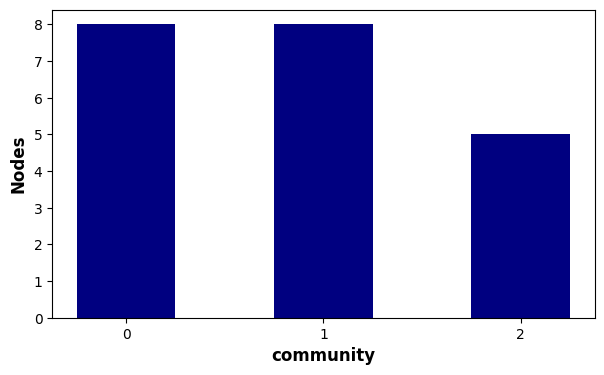

In [22]:
plt.figure(figsize = (7,4))
plt.bar(range(len(comm_sizes)), [x[1] for x in comm_sizes],width = 0.5, color = 'navy')
plt.xticks(range(len(comm_sizes)), [x[0] for x in comm_sizes])
plt.xlabel('community',size = 12, weight = 'bold')
plt.ylabel('Nodes',size = 12, weight = 'bold')
plt.show()